# CIBER filters

In [1]:
def ciber_filter(band, interp = False, interp_lim = [0.3,30]):
    '''
    get ciber filter transmittance
    output:
    wl_arr [um]
    T_arr : transmittance
    '''
    filtdir = '/Users/ytcheng/ciber/ciber_analysis/pro/imagers/paperfigs/'
    if band == 'I':
        data = np.loadtxt(filtdir + 'iband_transmittance.txt', skiprows=1)
        wl_arr = np.asarray(data[:,0])*1e-3
        T_arr = data[:,1]
        data = np.genfromtxt(filtdir + 'Iband_trans_digitize.txt', dtype=None, delimiter=',') 
        T_arr = np.asanyarray([T_arr[i]*data[i][1] for i,_ in enumerate(data)])*1e-4
    elif band == 'H':
        data = np.loadtxt(filtdir + 'hband_transmittance.txt', skiprows=1)
        wl_arr = np.asarray(data[:,0])*1e-3
        T_arr = data[:,1]
        data = np.genfromtxt(filtdir + 'Hband_trans_digitize.txt', dtype=None, delimiter=',') 
        T_arr = np.asanyarray([T_arr[i]*data[i][1] for i,_ in enumerate(data)])*1e-4
    else:
        print('input band incorrect')
        
    if interp:
        wl_data = wl_arr
        T_data = T_arr
        wl_arr = np.arange(interp_lim[0],interp_lim[1],0.001)
        T_arr = np.zeros_like(wl_arr)
        sp = np.where((wl_arr > wl_data[0]) & (wl_arr < wl_data[-1]))[0]
        T_arr[sp] = np.interp(wl_arr[sp],wl_data,T_data)        
        
    return wl_arr, T_arr

/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.


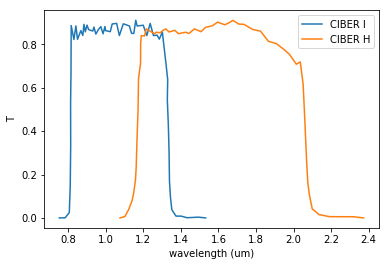

In [26]:
#
writedir = '/Users/ytcheng/ciber/lephare/lephare_dev/filt/ciber/'
ciber_bands = ['I','H']
plt.figure()
for iband,band in enumerate(ciber_bands):
    wl_arr,T_arr = ciber_filter(band)
    plt.plot(wl_arr,T_arr, label = 'CIBER '+band)
    
    N = len(wl_arr)
    file = open(writedir + band + '.pb','w')
    file.write(str(N)+'\t' + band + ' \t ' + str(iband+1) + ' \n')
    for idx in range(N):
        file.write(str("%.6f" % (wl_arr[idx]*10000))+'\t'+str("%.10f"% T_arr[idx])+'\n')
    file.close()
    
plt.xlabel('wavelength (um)')
plt.ylabel('T')
plt.legend(loc = 0)

# Euclid

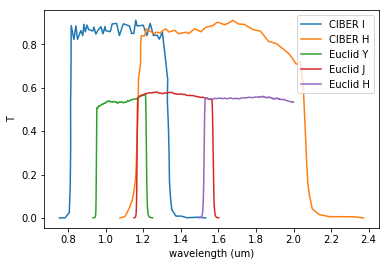

In [4]:
filtdir = '/Users/ytcheng/ciber/lephare/lephare_dev/filt/'

for band in ['I','H']:
    d = np.loadtxt(filtdir + 'ciber/' + band + '.pb',skiprows=1)
    plt.plot(d[:,0]/1e4,d[:,1],label='CIBER '+band)
for band in ['Y','J','H']:
    d = np.loadtxt(filtdir + 'euclid/Euclid_NISP.' + band + '.pb',skiprows=0)
    plt.plot(d[:,0]/1e4,d[:,1],label='Euclid '+band)
plt.xlabel('wavelength (um)')
plt.ylabel('T')
plt.legend()

plt.savefig('/Users/ytcheng/Desktop/euclid_filt.png', dpi = 100, bbox_inches='tight')

# 2MASS filters

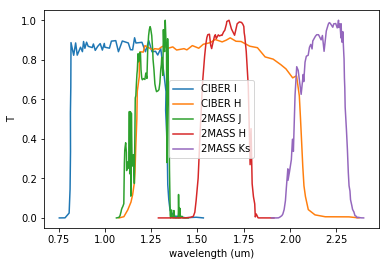

In [14]:
filtdir = '/Users/ytcheng/ciber/lephare/lephare_dev/filt/'

for band in ['I','H']:
    d = np.loadtxt(filtdir + 'ciber/' + band + '.pb',skiprows=1)
    plt.plot(d[:,0]/1e4,d[:,1],label='CIBER '+band)
for band in ['J','H','Ks']:
    d = np.loadtxt(filtdir + '2mass/' + band + '.pb',skiprows=1)
    plt.plot(d[:,0]/1e4,d[:,1],label='2MASS '+band)
plt.xlabel('wavelength (um)')
plt.ylabel('T')
plt.legend()

# HSC filters

https://www.naoj.org/Observing/Instruments/HSC/sensitivity.html

data from 'Broad-band filters' table - center - list

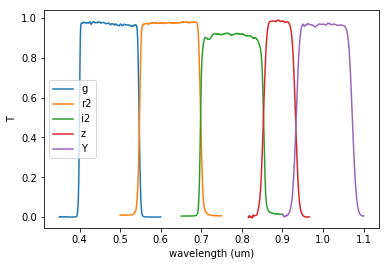

In [35]:
plt.figure()
datadir='../../doc/20170617_Stacking/maps/HSCcats/filters/'
writedir = '/Users/ytcheng/ciber/lephare/lephare_dev/filt/hsc/'
for ifilt,band in enumerate(['g','r2','i2','z','Y']):
    data = np.loadtxt(datadir + 'HSC-'+band+'.txt', skiprows=1)
    plt.plot(data[:,0]/1e4,data[:,1],label = band)
    
    wl_arr = data[:,0]
    T_arr = data[:,1]
    N = len(wl_arr)
    file = open(writedir + band + '.pb','w')
    file.write(str(N)+'\t' + band + ' \t ' + str(iband+1) + ' \n')
    for idx in range(N):
        file.write(str("%.1f" % wl_arr[idx])+'\t'+str("%.4f"% T_arr[idx])+'\n')
    file.close()

plt.xlabel('wavelength (um)')
plt.ylabel('T')
plt.legend(loc = 0)    

# Write PanSTARRS Filter File for lephare

filter dowload from http://ipp.ifa.hawaii.edu/

In [21]:
datadir='../../doc/20170617_Stacking/maps/PanSTARRScats/'
data = np.loadtxt(datadir + 'psfilter.txt', skiprows=26)

In [22]:
wl = data[:,0] # nm
op = data[:,1]
g = data[:,2]
r = data[:,3]
i = data[:,4]
z = data[:,5]
y = data[:,6]
w = data[:,7]
aero = data[:,8]
ray = data[:,9]
mol = data[:,10]

In [23]:
# the wl is in units [angstrom]
writedir = '/Users/ytcheng/ciber/lephare/lephare_dev/filt/panstarrs/'
N = len(wl)

file = open(writedir + 'g.pb','w')
file.write(str(N)+'\t g \t 1 \n')
for idx in range(N):
    file.write(str(wl[idx]*10)+'\t'+str(g[idx])+'\n')
file.close()

file = open(writedir + 'r.pb','w')
file.write(str(N)+'\t r \t 2 \n')
for idx in range(N):
    file.write(str(wl[idx]*10)+'\t'+str(r[idx])+'\n')
file.close()

file = open(writedir + 'i.pb','w')
file.write(str(N)+'\t i \t 3 \n')
for idx in range(N):
    file.write(str(wl[idx]*10)+'\t'+str(i[idx])+'\n')
file.close()

file = open(writedir + 'z.pb','w')
file.write(str(N)+'\t z \t 4 \n')
for idx in range(N):
    file.write(str(wl[idx]*10)+'\t'+str(z[idx])+'\n')
file.close()

file = open(writedir + 'y.pb','w')
file.write(str(N)+'\t y \t 5 \n')
for idx in range(N):
    file.write(str(wl[idx]*10)+'\t'+str(y[idx])+'\n')
file.close()

Text(0.5,0,'angstrom')

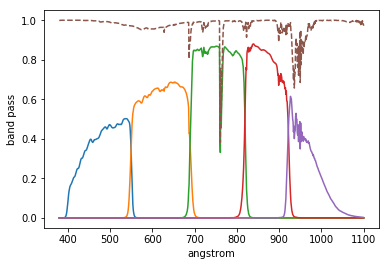

In [25]:
plt.plot(wl,g)
plt.plot(wl,r)
plt.plot(wl,i)
plt.plot(wl,z)
plt.plot(wl,y)
plt.plot(wl,mol,'--')
plt.ylabel('band pass')
plt.xlabel('angstrom')

# Write WISE Filter File for lephare

filter dowload from http://www.astro.ucla.edu/~wright/WISE/passbands.html

In [15]:
datadir='../../doc/20170617_Stacking/maps/wisecats/'
writedir = '/Users/ytcheng/ciber/lephare/lephare_dev/filt/wise/'

for band in [1,2,3,4]:
    data = np.loadtxt(datadir + 'filterW' + str(band) + '.txt')
    wl = data[:,0] # um
    bpass = data[:,1]
    N = len(wl)
    file = open(writedir + 'w' + str(band) +'.pb','w')
    file.write(str(N)+'\t w' + str(band) + ' \t ' + str(band) + ' \n')
    for idx in range(N):
        file.write(str(wl[idx]*1e4)+'\t'+str(bpass[idx])+'\n')
    file.close()

Text(0.5,0,'um')

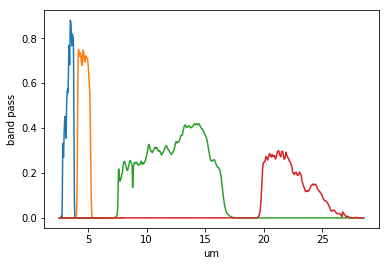

In [17]:
datadir='../../doc/20170617_Stacking/maps/wisecats/'

for band in [1,2,3,4]:
    data = np.loadtxt(datadir + 'filterW' + str(band) + '.txt')
    wl = data[:,0] # um
    bpass = data[:,1]
    plt.plot(wl,bpass)
plt.ylabel('band pass')
plt.xlabel('um')